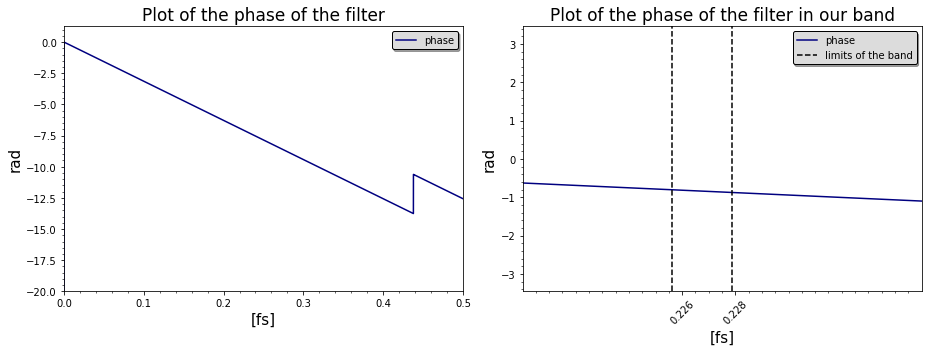

In [27]:

 

from scipy import fft     
from scipy import signal
from scipy import fftpack
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import wavio as wv
import os
import math
import cmath

#PATH 
current_path = os.getcwd()

#FILTER DESIGN
numtaps = 11
f = [9950,10050]
fs = 44100
coeff = signal.firwin(numtaps, f, pass_zero ='bandpass',fs=fs)
#print(coeff)

#FILTER FREQUENCY RESPONSE
fft_coeff = fftpack.fft(coeff,20000)
pow = np.abs(fft_coeff)      #amplitude response
phase = np.angle(fft_coeff)  #computing the phase
phase_unwrap = np.unwrap(p=phase) #Toglie le discontinuità
freqs_H = fftpack.fftfreq(20000)
#print(freqs_H)
idx = np.argsort(freqs_H)
#print(freqs_H[idx])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
ax[0].plot(freqs_H[idx], phase_unwrap[idx], label = 'phase', color='navy')
ax[0].set_xlim(left=0, right=0.5)
ax[0].set_ylim(bottom=-20)
ax[0].set_xlabel('[fs]', fontsize=15)
ax[0].set_ylabel('rad', fontsize=15)
ax[0].set_title('Plot of the phase of the filter', fontsize=17)
ax[0].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':10}, loc='upper right')
ax[0].minorticks_on()
ax[1].plot(freqs_H[idx], phase[idx], label='phase', color='navy')
ax[1].set_xlim(left=0.20, right=0.26)
ax[1].set_xlabel('[fs]', fontsize=15)
ax[1].set_ylabel('rad', fontsize=15)
ax[1].set_title('Plot of the phase of the filter in our band', fontsize=17)
ax[1].axvline(x=(f[0]/fs), linestyle='--', color ='black', label='limits of the band' ) # Limits of our band
ax[1].axvline(x=(f[1]/fs), linestyle='--', color ='black' )
ax[1].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':10}, loc='upper right')
ax[1].set_xticks(np.around(np.array(f)/fs,3))
ax[1].minorticks_on()
plt.xticks(rotation = 45)
ax[1].set_xlim(left=0.22, right=0.235)
fig.tight_layout()

freq_sample_1, sig_audio_1 = wavfile.read("10kHz_44100Hz_16bit_05sec.wav")# portante_1
freq_sample_2, sig_audio_2 = wavfile.read("1kHz_44100Hz_16bit_05sec.wav")# portante_2
freq_sample_3, sig_audio_3 = wavfile.read("filtered.wav") #fpga filtered signal
freq_sample_4, sig_audio_4 = wavfile.read("audiocheck.net_sin_100Hz_-3dBFS_5s.wav")#16 bit, modulante

#CONVOLUTION BETWEEN FILTER AND THE SIGNAL
N=len(coeff)+len(sig_audio_1)-1 #lunghezza della convoluzione (lunghezza segnale + lunghezza coefficienti - 1)

#GENERATE FILE .WAV SUM sig_audio_1+sig_audio_2
file_name = "10KHz_sum_1KHz.wav"
path = current_path
sum_sig = sig_audio_1/np.power(2,16)+sig_audio_2/np.power(2,16)
wv.write(os.path.join(path,file_name),sum_sig,44100,sampwidth=2)

freq_sample_5, sig_audio_5 = wavfile.read("10KHz_sum_1KHz.wav")#16 bit, modulante
N_fpga =len(sig_audio_3)

In [28]:
len(sig_audio_3)

222720

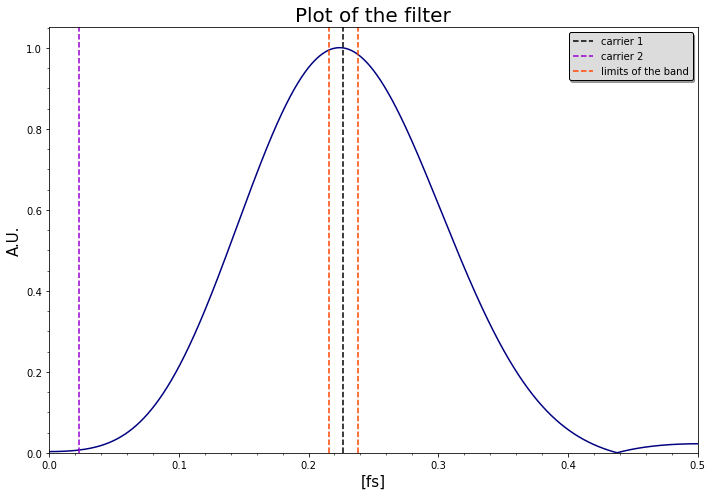

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
ax.plot(freqs_H[idx], pow[idx], color ='navy')
ax.axvline(x=(10000/fs), linestyle='--', color ='black', label='carrier 1' )
ax.axvline(x=(1000/fs), linestyle='--', color ='darkviolet', label='carrier 2' )
ax.axvline(x=(10500/fs), linestyle='--', color ='orangered', label='limits of the band' )
ax.axvline(x=(9500/fs), linestyle='--', color ='orangered' )
ax.set_xlim(left=0, right=0.5)
ax.set_xlabel('[fs]', fontsize=15)
ax.set_ylabel('A.U.', fontsize=15)
ax.set_title('Plot of the filter', fontsize=20)
ax.legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':10}, loc='upper right')
ax.set_ylim(bottom=0)
ax.minorticks_on()
fig.tight_layout()

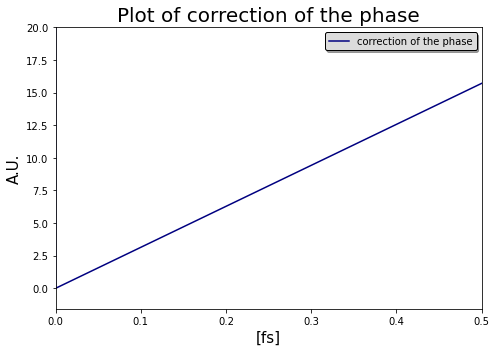

In [30]:
N=len(coeff)+len(sig_audio_1)-1 #lunghezza della convoluzione (lunghezza segnale + lunghezza coefficienti - 1)
freqs = fftpack.fftfreq(N)
idx=np.argsort(freqs)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
exp=(1j*(numtaps-1)*0.5)*freqs*2*math.pi
correction = np.exp(exp)
phase_correction = np.angle(correction)
phase_correction = np.unwrap(phase_correction)
ax.plot(freqs[idx],phase_correction[idx], color='navy', label='correction of the phase')# Fase della correzione, opposta dell'altra, le fasi si annullano
ax.set_xlim(left=0, right=0.5)
ax.set_ylim(top=20)
ax.set_xlabel('[fs]', fontsize=15)
ax.set_ylabel('A.U.', fontsize=15)
ax.legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':10}, loc='upper right')
ax.set_title('Plot of correction of the phase', fontsize=20)
fig.tight_layout()# lineare, non distorciamo il segnale trasmesso

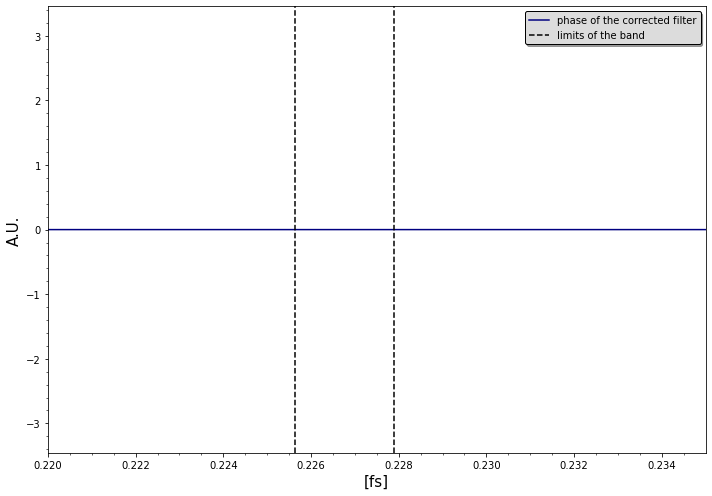

In [31]:
fft_coeff = fftpack.fft(coeff,N)
fft_coeff_corr = fft_coeff*correction # Correggiamo la fase
phase_corr = np.angle(fft_coeff_corr)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
ax.plot(freqs[idx],phase_corr[idx], color = 'navy', label = 'phase of the corrected filter')
ax.minorticks_on()
ax.set_xlabel('[fs]', fontsize=15)
ax.set_ylabel('A.U.', fontsize=15)
ax.axvline(x=(f[0]/fs), linestyle='--', color ='black', label='limits of the band' ) # Limits of our band
ax.axvline(x=(f[1]/fs), linestyle='--', color ='black' )
ax.legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':10}, loc='upper right')
ax.set_xlim(left=0.22, right=0.235)
fig.tight_layout()

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


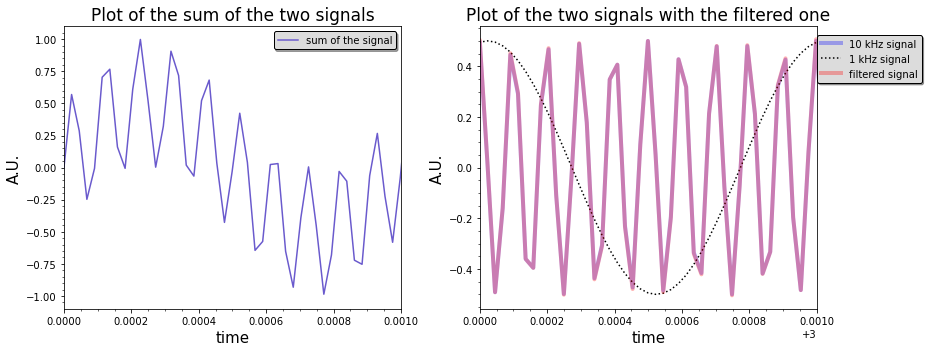

In [32]:
# Normalize the Signal Value and Plot it on a graph
pow_audio_signal_1 = sig_audio_1 / np.power(2, 16)      #the signals in the sum have half of the max amplitude
pow_audio_signal_2 = sig_audio_2 / np.power(2, 16)      #otherwise distorsion
pow_audio_signal_3 = sig_audio_3 / np.power(2, 15)
pow_audio_signal_4 = sig_audio_4 / np.power(2, 15)
pow_audio_signal_4 = pow_audio_signal_4[:-1]
pow_audio_signal_5 = sig_audio_5 / np.power(2,15)


time_axis = np.arange(0, len(pow_audio_signal_1), 1) / float(freq_sample_1)
#time_axis = np.linspace(0, len(pow_audio_signal_1), )

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
ax[0].plot(time_axis, pow_audio_signal_5, color='slateblue', label='sum of the signal')
ax[0].set_xlim(right=1/1000,left=0)
ax[0].set_xlabel('time', fontsize=15)
ax[0].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':10}, loc='upper right')
ax[0].set_title('Plot of the sum of the two signals', fontsize=17)
ax[0].set_ylabel('A.U.', fontsize=15)
ax[0].minorticks_on()



#fft_coeff = fftpack.fft(coeff,N)    #Shift della fase
fft_somma = fftpack.fft(pow_audio_signal_5,N) 
out_corr = fft_somma*fft_coeff*correction
out = fft_somma*fft_coeff
freqs = fftpack.fftfreq(N)
idx=np.argsort(freqs)
#TIME DOMAIN FILTERED SIGNAL
time_output = fftpack.ifft(out,N)
time_output_corr = fftpack.ifft(out_corr,N)
#print(time_output)
time_output_1=time_output[numtaps-1:]
time_output_corr_1=time_output_corr[numtaps-1:]
ax[1].plot(time_axis-(10/freq_sample_1),pow_audio_signal_1,color='blue', label='10 kHz signal', alpha=0.3, linewidth=4)# Non prendiamo i primi 10, quindi shiftiamo l'11 al primo posto
ax[1].plot(time_axis-(10/freq_sample_1),pow_audio_signal_2,':',color='black', label='1 kHz signal')
ax[1].plot(time_axis,time_output_corr_1,color='red', label='filtered signal', alpha=0.3, linewidth=4)
ax[1].set_xlim(left=3, right=3+1/1000)
ax[1].set_xlabel('time', fontsize=15)
ax[1].set_ylabel('A.U.', fontsize=15)
ax[1].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':10}, loc=[1,0.8])
ax[1].set_title('Plot of the two signals with the filtered one', fontsize=17)
ax[1].minorticks_on()

#0.5*(freq_sample_1)/(10*10000*1000)

fig.tight_layout()

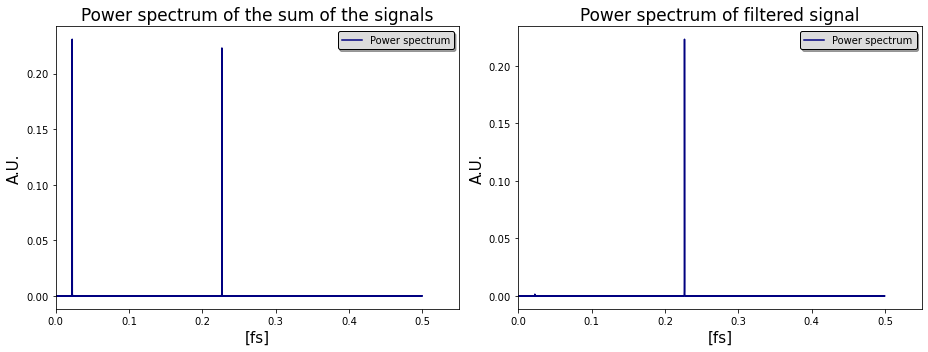

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
fft_audio_1 = fft_somma / N #normalization
fft_audio_2 = out / N       #normalization
out = fft_somma*fft_coeff
freqs = fftpack.fftfreq(N)
ax[0].plot(freqs, np.abs(fft_audio_1), color='navy', label = 'Power spectrum')
ax[0].set_title('Power spectrum of the sum of the signals', fontsize=17)
ax[1].plot(freqs, np.abs(fft_audio_2), color='navy', label = 'Power spectrum')
ax[1].set_title('Power spectrum of filtered signal', fontsize=17)
for x in ax:
    x.legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':10}, loc='upper right')
    x.set_xlabel('[fs]', fontsize=15)
    x.set_xlim(left = 0)
    x.set_ylabel('A.U.', fontsize=15)
fig.tight_layout()

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


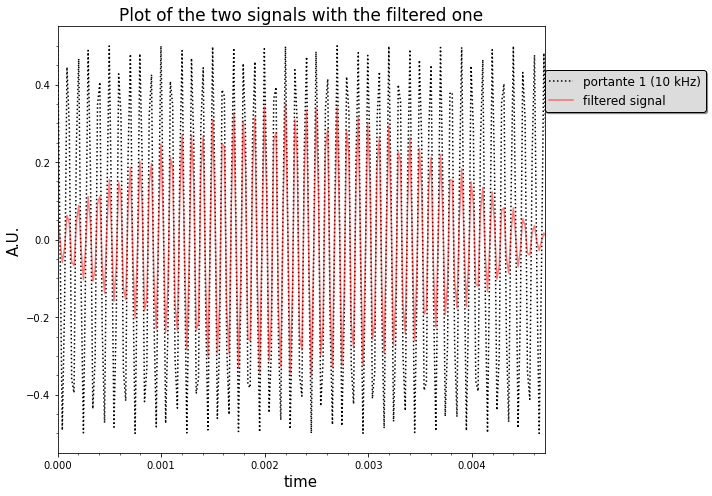

In [34]:
multiplication_1 = pow_audio_signal_4*pow_audio_signal_1 # modulante*portante_1

#CONVOLUTION BETWEEN FILTER AND THE SIGNAL
N=len(coeff)+len(sig_audio_1)-1 #lunghezza della convoluzione (lunghezza segnale + lunghezza coefficienti - 1)


#fft_coeff = fftpack.fft(coeff,N)    #Shift della fase
fft_multiplication_1 = fftpack.fft(multiplication_1,N) 
out_corr = fft_multiplication_1*fft_coeff_corr
out_p1 = fft_multiplication_1*fft_coeff
freqs = fftpack.fftfreq(N)
idx=np.argsort(freqs)
#TIME DOMAIN FILTERED SIGNAL
time_output = fftpack.ifft(out_p1,N)
time_output_corr_2 = fftpack.ifft(out_corr,N)
#print(time_output)
time_output=time_output[numtaps-1:]
time_output_corr_2=time_output_corr_2[numtaps-1:]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
#ax.plot(time_axis-(10/freq_sample_1),pow_audio_signal_1,color='blue', label='10 kHz signal', alpha=0.5)# Non prendiamo i primi 10, quindi shiftiamo l'11 al primo posto
ax.plot(time_axis-(10/freq_sample_1),pow_audio_signal_1,':',color='black', label='portante 1 (10 kHz)') #portnate_1
ax.plot(time_axis,time_output_corr_2,color='red', label='filtered signal', alpha=0.5)
ax.set_xlim(left=0, right=4.7/1000)
ax.set_xlabel('time', fontsize=15)
ax.set_ylabel('A.U.', fontsize=15)
ax.legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':12}, loc=[1,0.8])
ax.set_title('Plot of the two signals with the filtered one', fontsize=17)
ax.minorticks_on()

#0.5*(freq_sample_1)/(10*10000*1000)
# rossa = filtrato, blu=modulante=segnale utile, nera = portante
fig.tight_layout()

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


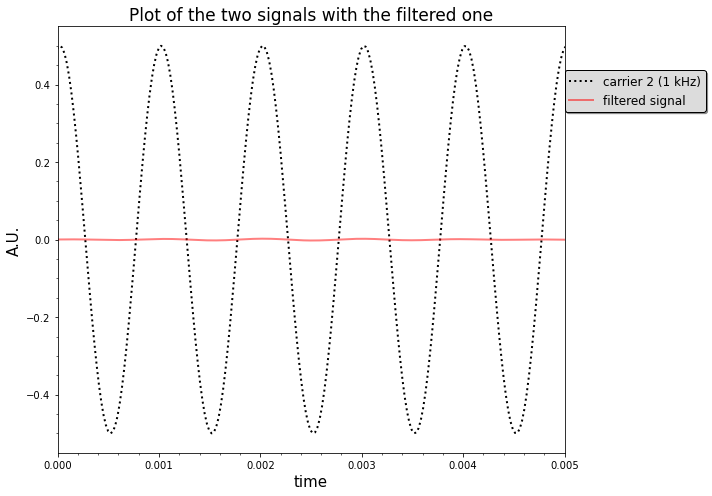

In [35]:
multiplication_2 = pow_audio_signal_4*pow_audio_signal_2 # modulante * portante_2


#fft_coeff = fftpack.fft(coeff,N)    #Shift della fase
fft_multiplication_2 = fftpack.fft(multiplication_2,N) 
out_corr_p2 = fft_multiplication_2*fft_coeff_corr
out_p2 = fft_multiplication_2*fft_coeff
freqs = fftpack.fftfreq(N)
idx=np.argsort(freqs)
#TIME DOMAIN FILTERED SIGNAL
time_output = fftpack.ifft(out_p2,N)
time_output_corr_3 = fftpack.ifft(out_corr_p2,N)
#print(time_output)
#time_output=time_output[numtaps-1:]
time_output_corr_3=time_output_corr_3[numtaps-1:]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
#ax.plot(time_axis-(10/freq_sample_1),pow_audio_signal_1,color='blue', label='10 kHz signal', alpha=0.5)# Non prendiamo i primi 10, quindi shiftiamo l'11 al primo posto
ax.plot(time_axis-(10/freq_sample_1),pow_audio_signal_2,':',color='black', label='carrier 2 (1 kHz)', linewidth=2)
ax.plot(time_axis,time_output_corr_3,color='red', label='filtered signal', alpha=0.5, linewidth=2)
ax.set_xlim(left=0, right=5/1000)
ax.set_xlabel('time', fontsize=15)
ax.legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':12}, loc=[1,0.8])
ax.set_title('Plot of the two signals with the filtered one', fontsize=17)
ax.set_ylabel('A.U.', fontsize=15)
ax.minorticks_on()

# rossa = filtrato, blu=modulante=segnale utile, nera = portante
fig.tight_layout()

In [36]:
fft_fpga = fftpack.fft(pow_audio_signal_3,N_fpga)/N_fpga #Consideriamo il giusto numero di campioni (non 5 secondi precisi)
freq_fpga = fftpack.fftfreq(N_fpga)

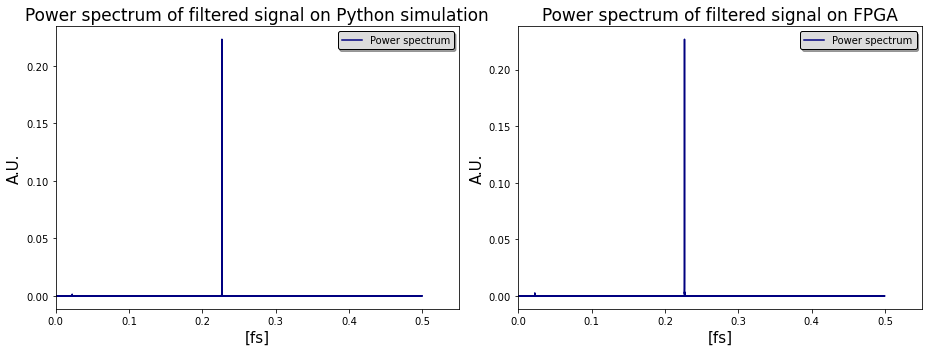

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

ax[0].plot(freqs, np.abs(fft_audio_2), color='navy', label = 'Power spectrum')
ax[0].set_title('Power spectrum of filtered signal on Python simulation', fontsize=17)
ax[0].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':10}, loc='upper right')
ax[0].set_xlabel('[fs]', fontsize=15)
ax[0].set_xlim(left = 0)
ax[0].set_ylabel('A.U.', fontsize=15)
ax[1].plot(freq_fpga, np.abs(fft_fpga),color='navy', label = 'Power spectrum')
ax[1].set_title("Power spectrum of filtered signal on FPGA", fontsize=17)
ax[1].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':10}, loc='upper right')
ax[1].set_xlabel('[fs]', fontsize=15)
ax[1].set_xlim(left = 0)
ax[1].set_ylabel('A.U.', fontsize=15)
fig.tight_layout()



In [38]:
print(N/N_fpga)

0.9900772270114943


/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


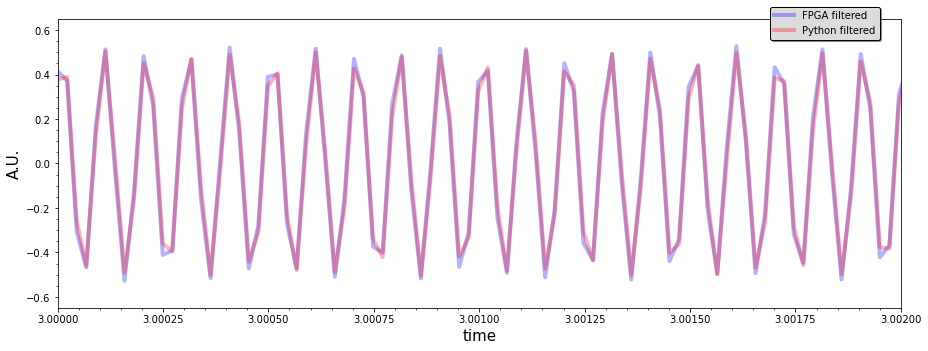

In [55]:
#N_fpga =len(sig_audio_3)
time_axis_1 = time_axis
time_axis_2 = np.arange(0,N_fpga,1)/float(freq_sample_3)
fig, ax = plt.subplots(figsize=(13,5))
ax.plot(time_axis_2,pow_audio_signal_3,color='blue', label='FPGA filtered', alpha=0.3, linewidth=4)
ax.plot(time_axis_1,time_output_1,color='red', label='Python filtered', alpha=0.3, linewidth=4)
ax.set_xlim(left=3,right=3+1/500)
ax.set_xlabel('time', fontsize=15)
ax.set_ylabel('A.U.', fontsize=15)
ax.minorticks_on()
ax.legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':10}, loc=[0.845,0.93])
fig.tight_layout()

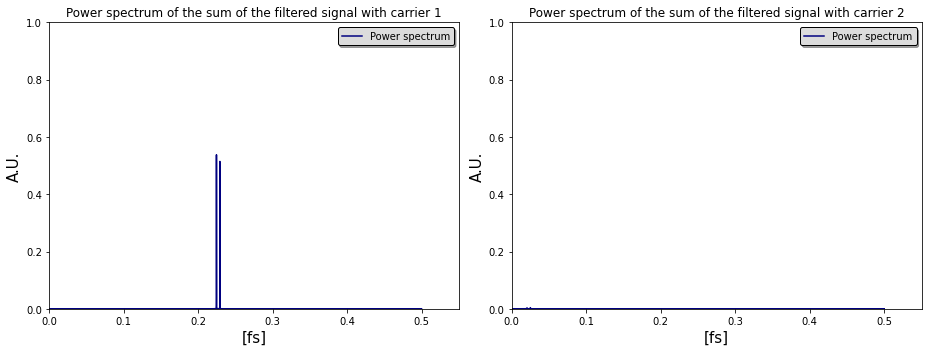

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
fft_audio_1 = out_p1 / np.power(2, 15)
fft_audio_2 = out_p2 / np.power(2, 15)
freqs = fftpack.fftfreq(N)
ax[0].plot(freqs, np.abs(fft_audio_1), color='navy', label = 'Power spectrum', scaley=False)
ax[0].set_xlim(left = 0)
ax[0].set_title('Power spectrum of the sum of the filtered signal with carrier 1', fontsize=12)
ax[1].plot(freqs, np.abs(fft_audio_2), color='navy', label = 'Power spectrum', scaley=False)
ax[1].set_xlim(left = 0)
ax[1].set_title('Power spectrum of the sum of the filtered signal with carrier 2', fontsize=12)
for x in ax:
    x.legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':10}, loc='upper right')
    x.set_xlabel('[fs]', fontsize=15)
    x.set_ylabel('A.U.', fontsize=15)
fig.tight_layout()

In [41]:
sig_audio_3

array([ 159, -113, -446, ...,   -4, -209,   -2], dtype=int16)